In [204]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import ipywidgets as widgets
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import pickle
import joblib

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time

from tensorflow import keras
from tensorflow.keras import layers

from rich.progress import track

from termcolor import colored

from sklearn.linear_model import LinearRegression

from pandas.plotting import scatter_matrix

from ipywidgets import interact, interactive, fixed, interact_manual

print(tf.__version__)

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2.10.0
2023-05-09 20:20:24
20:20:24


In [117]:
metric_file_name = 'metric_train_by_none.log'

In [118]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [119]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,54914.0,727424.8,0.0,42991.2,100.0,182.8,182.8,182.9,182.3,182.4
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,47587.6,725717.6,0.0,37337.2,100.0,131.1,131.1,131.0,131.1,131.1
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,42023.2,724221.6,0.0,34854.0,100.0,235.0,235.0,235.0,235.0,235.1
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,38244.0,723113.6,0.0,28973.2,100.0,264.9,264.9,284.9,264.9,285.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,39842.8,724387.2,0.0,28122.8,100.0,259.4,259.4,260.1,259.4,260.2


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,224.0,370.353299,724.126108,67.528050,84.439000,94.528150,145.046737,2800.500400
response_time,224.0,208.113452,436.441158,53.919527,70.298126,73.024617,87.004650,2415.910126
worker_number,224.0,4.941964,2.743313,1.000000,3.000000,5.000000,7.000000,9.000000
request_rate,224.0,15.723661,12.297403,0.100000,4.900000,13.750000,24.350000,40.100000
CPU0User%,224.0,22.253571,16.233290,5.100000,9.600000,14.850000,34.850000,57.800000
CPU0Idle%,224.0,50.551339,24.092075,0.100000,33.975000,59.300000,67.125000,86.300000
CPU0Total%,224.0,39.916964,29.724984,9.000000,16.175000,26.500000,63.775000,99.900000
[DSK:sda]Reads,224.0,107.448661,87.695564,3.800000,36.850000,65.500000,212.000000,307.100000
[DSK:sda]RMerge,224.0,81.942411,75.448909,0.000000,13.775000,53.350000,158.875000,238.800000
[DSK:sda]RKBytes,224.0,3428.738393,2950.415061,146.800000,1072.650000,1974.700000,6720.025000,10954.500000


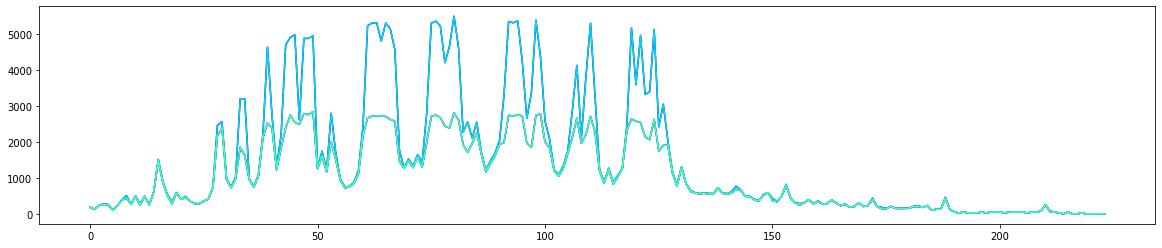

In [121]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.show()

In [122]:
df['worker_give_metrics'].unique()

array(['192.168.0.170'], dtype=object)

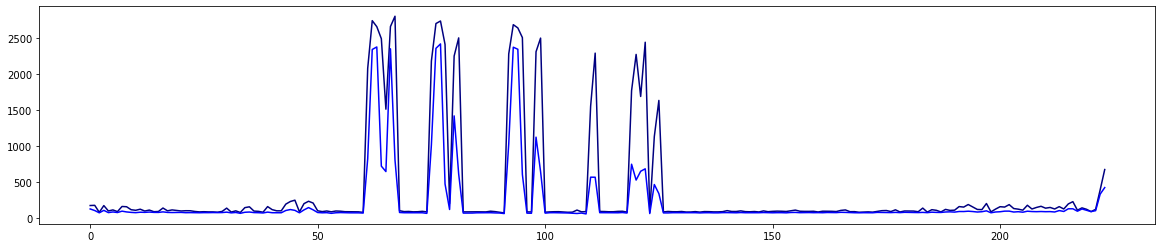

In [123]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

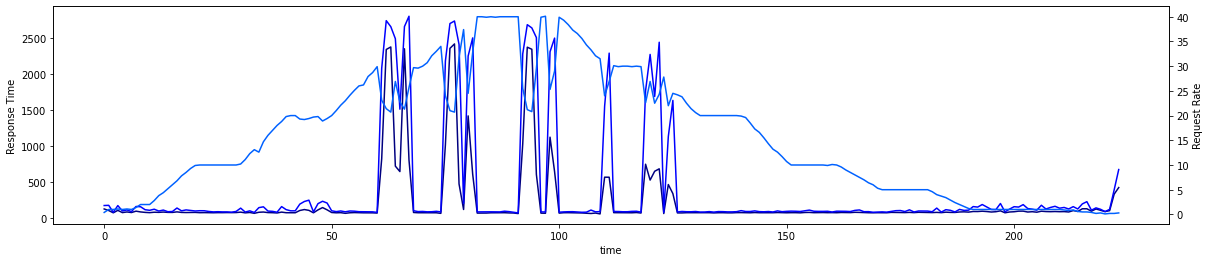

In [124]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

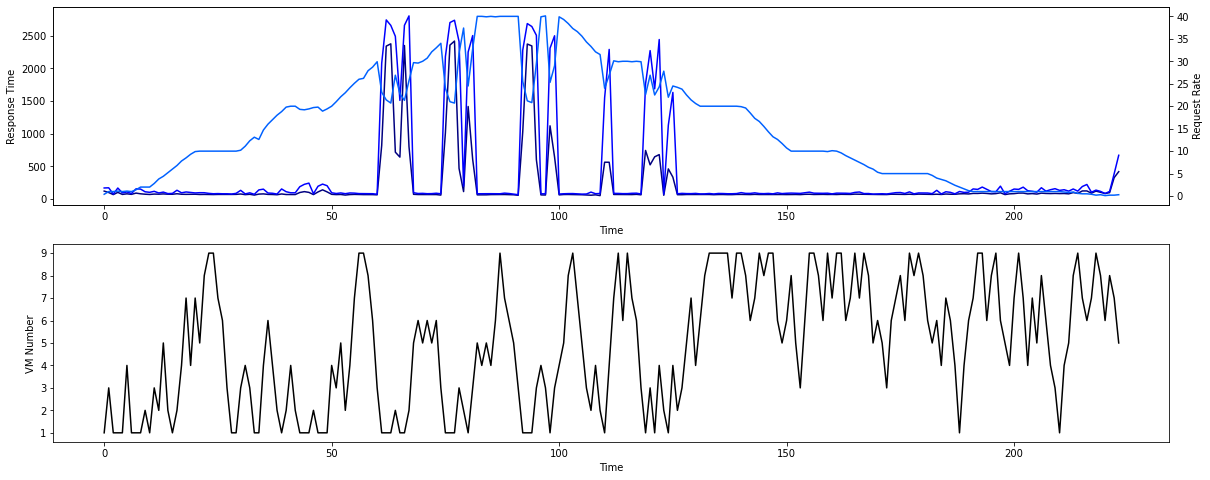

In [125]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [126]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,224.000000,224.000000,224.000000,224.000000
mean,370.353299,208.113452,4.941964,15.723661
std,724.126108,436.441158,2.743313,12.297403
min,67.528050,53.919527,1.000000,0.100000
25%,84.439000,70.298126,3.000000,4.900000
50%,94.528150,73.024617,5.000000,13.750000
75%,145.046737,87.004650,7.000000,24.350000
max,2800.500400,2415.910126,9.000000,40.100000


In [127]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', '[DSK:sda]Reads', '[DSK:sda]RMerge',
       '[DSK:sda]RKBytes', '[DSK:sda]WaitR', '[DSK:sda]Writes',
       '[DSK:sda]WMerge', '[DSK:sda]WKBytes', '[DSK:sda]WaitW',
       '[DSK:sda]Request', '[DSK:sda]QueLen', '[DSK:sda]Wait',
       '[DSK:sda]SvcTim', '[DSK:sda]Util', '[NUMA:0]Used', '[NUMA:0]Free',
       '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[NUMA:0]AnonH',
       '[NUMA:0]Inactive', '[NUMA:0]Hits', '[TCPD]InReceives',
       '[TCPD]InDelivers', '[TCPD]OutRequests', '[TCPD]InSegs',
       '[TCPD]OutSegs'],
      dtype='object')

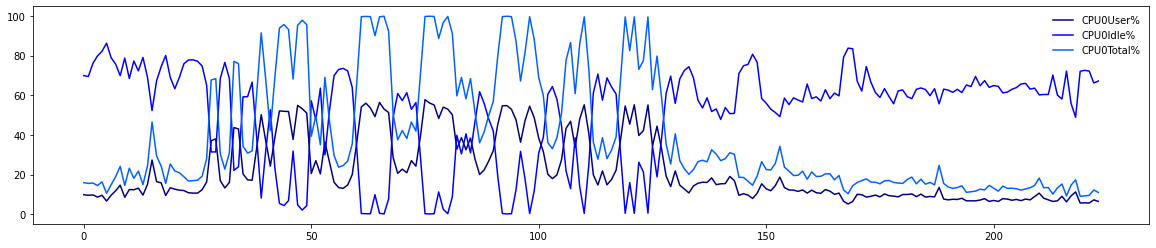

In [128]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [129]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,224.000000,224.000000,224.000000
mean,22.253571,50.551339,39.916964
std,16.233290,24.092075,29.724984
min,5.100000,0.100000,9.000000
25%,9.600000,33.975000,16.175000
50%,14.850000,59.300000,26.500000
75%,34.850000,67.125000,63.775000
max,57.800000,86.300000,99.900000


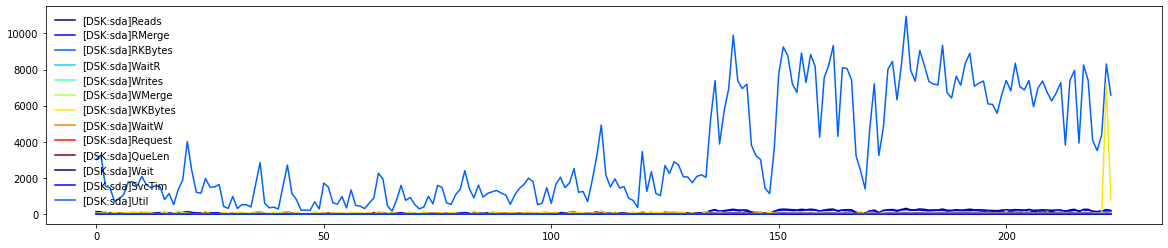

In [130]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [131]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,107.448661,81.942411,3428.738393,1.181250,11.944196,2.025893,94.38750,0.803125,21.215625,0.042857,1.560714,1.599107,17.462500
std,87.695564,75.448909,2950.415061,0.578545,10.057648,0.681497,479.54798,0.334073,11.616000,0.061687,0.463726,0.488155,12.864479
min,3.800000,0.000000,146.800000,0.200000,0.200000,0.500000,3.20000,0.400000,5.700000,0.000000,0.500000,0.400000,1.100000
25%,36.850000,13.775000,1072.650000,0.600000,0.400000,1.500000,8.40000,0.600000,11.000000,0.000000,1.200000,1.300000,6.575000
50%,65.500000,53.350000,1974.700000,1.100000,14.550000,2.100000,70.65000,0.800000,18.500000,0.000000,1.600000,1.600000,11.600000
75%,212.000000,158.875000,6720.025000,1.700000,19.400000,2.600000,92.95000,0.900000,31.150000,0.100000,1.900000,1.900000,32.400000
max,307.100000,238.800000,10954.500000,2.500000,40.700000,3.900000,7172.80000,3.400000,50.400000,0.200000,2.800000,3.600000,47.000000


In [132]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.0,224.000000,224.0
mean,930282.435714,74429.564286,88173.267857,37808.751786,743808.203571,0.0,31005.332143,100.0
std,7169.697052,7169.697052,973.428050,5461.416017,12665.790151,0.0,4313.345708,0.0
min,906185.200000,63453.200000,86218.400000,27806.000000,722512.000000,0.0,21418.000000,100.0
25%,927412.000000,69324.500000,87228.500000,33527.900000,730075.100000,0.0,27737.700000,100.0
50%,931523.600000,73188.400000,88444.000000,36541.200000,747827.000000,0.0,30769.200000,100.0
75%,935387.500000,77300.000000,88775.100000,40975.600000,755090.800000,0.0,34270.100000,100.0
max,941258.800000,98526.800000,90460.400000,54914.000000,758834.800000,0.0,42991.200000,100.0


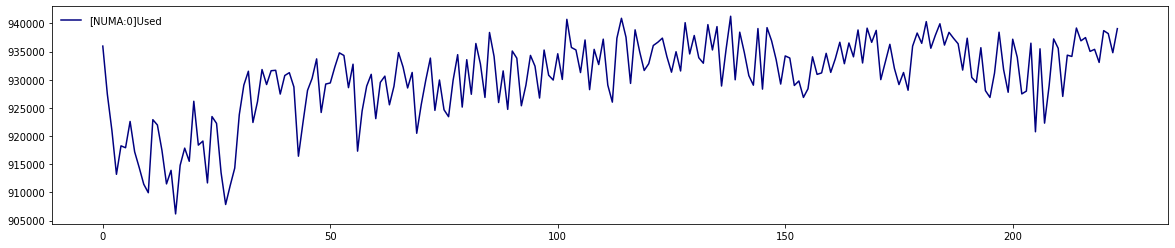

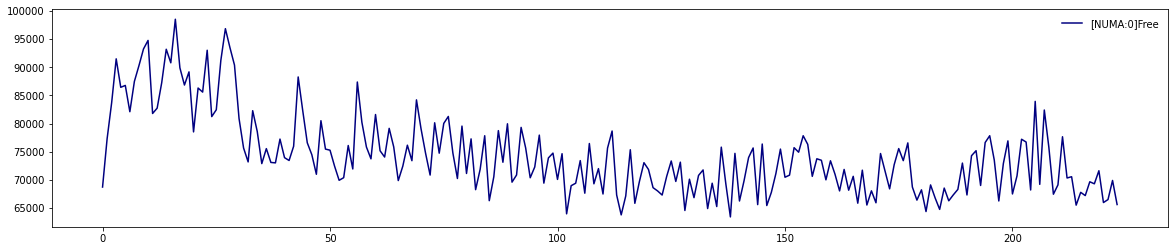

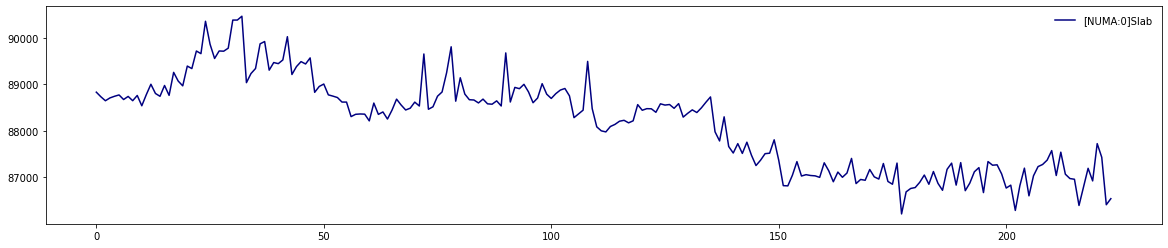

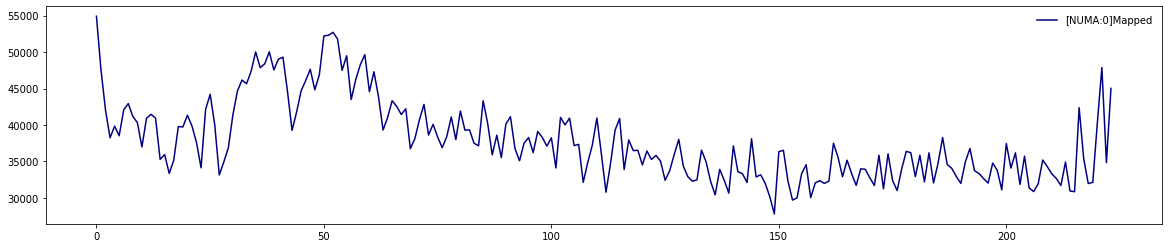

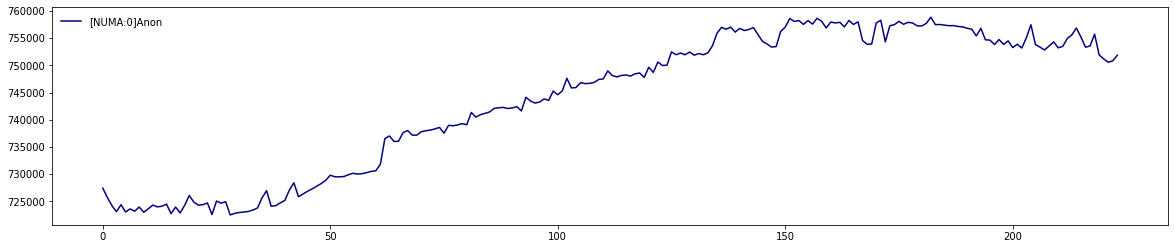

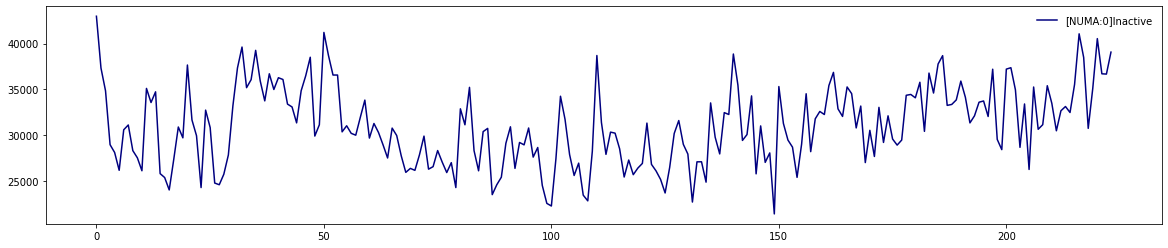

In [133]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

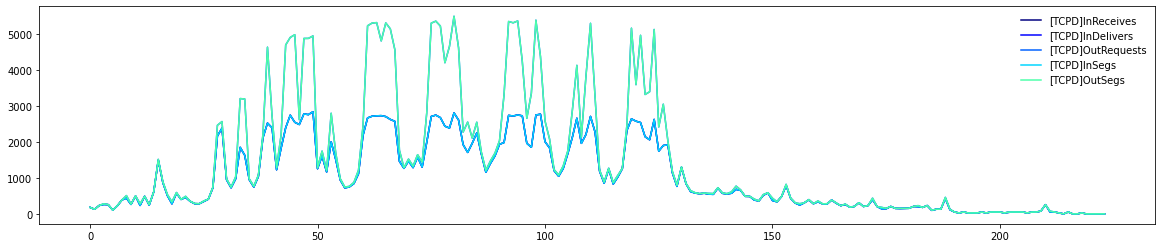

In [134]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'TCP' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [135]:
train_log_file_name  = 'scaled_train_by_none.log'

In [136]:
cf = pd.read_csv(train_log_file_name, sep=',', header=0)

In [137]:
print(cf.count()[0])

367


In [138]:
cf['otime'] = cf['time']

cf['time'] = cf['otime'].str[:-1]

In [139]:
cf.head()

,time,notification,actual_vm_number_was,actual_vm_number_is,otime
0,20:07:3,Worker 192.168.0.116 added.,1,2,20:07:33
1,20:07:3,Worker 192.168.0.46 added.,2,3,20:07:33
2,20:07:4,Worker 192.168.0.116 removed.,3,2,20:07:42
3,20:07:4,Worker 192.168.0.46 removed.,2,1,20:07:42
4,20:08:1,Worker 192.168.0.116 added.,1,2,20:08:11


In [140]:
cf['notification'].unique()

array(['Worker 192.168.0.116 added.', 'Worker 192.168.0.46 added.',
       'Worker 192.168.0.116 removed.', 'Worker 192.168.0.46 removed.',
       'Worker 192.168.0.219 added.', 'Worker 192.168.0.219 removed.',
       'Worker 192.168.0.233 added.', 'Worker 192.168.0.233 removed.',
       'Worker 192.168.0.230 added.', 'Worker 192.168.0.243 added.',
       'Worker 192.168.0.145 added.', 'Worker 192.168.0.166 added.',
       'Worker 192.168.0.230 removed.', 'Worker 192.168.0.243 removed.',
       'Worker 192.168.0.145 removed.', 'Worker 192.168.0.166 removed.'],
      dtype=object)

In [141]:
# brutálisan rossz ötlet volt, hogy ezt az adatbázis tegyem össze a másikkal, mivel ha több gépet is hozzáadok
# akkor ebbe több bejegyzés is bele került és teljesen eviszi az egészet

# ezért ezt úgy ahogy van el kell felejtenem a picsába és az lesz a mértékadó, hogy az eslőből
# kinézem, hogy hány gép került hozzáadásra.

In [142]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.170,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,...,100.0,182.8,182.8,182.9,182.3,182.4,1,NaN,3.0,2.0
1,192.168.0.170,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,...,100.0,131.1,131.1,131.0,131.1,131.1,3,1.0,1.0,-2.0
2,192.168.0.170,20:07:51,20:07:5,76.25155,69.350800,1,1.0,9.7,76.1,15.7,...,100.0,235.0,235.0,235.0,235.0,235.1,1,3.0,1.0,0.0
3,192.168.0.170,20:08:01,20:08:0,169.67600,103.225818,1,1.1,8.6,79.8,14.4,...,100.0,264.9,264.9,284.9,264.9,285.0,1,1.0,1.0,0.0
4,192.168.0.170,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,...,100.0,259.4,259.4,260.1,259.4,260.2,1,1.0,4.0,3.0


In [143]:
mf['delta_vm'].unique()

array([ 2., -2.,  0.,  3., -3.,  1., -1., nan])

In [144]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

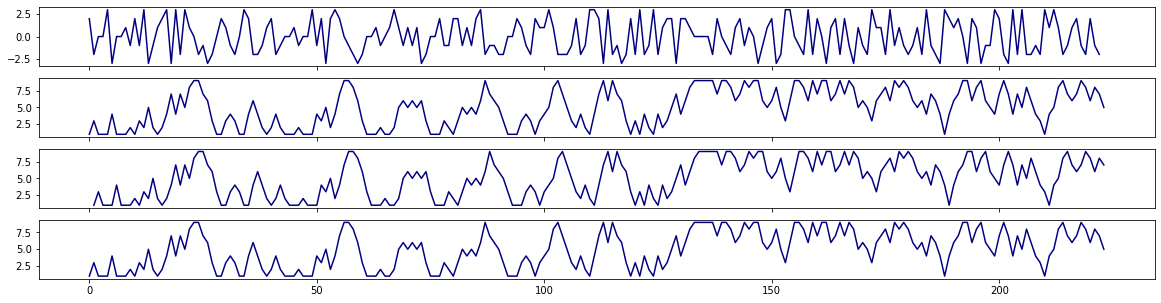

In [145]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])
plt.show()

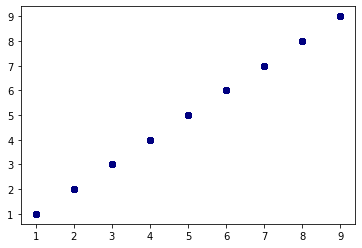

In [146]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])
plt.show()

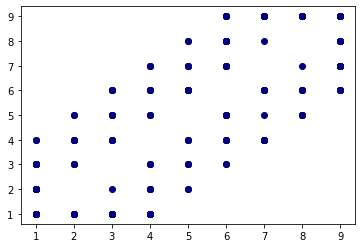

In [147]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])
plt.show()

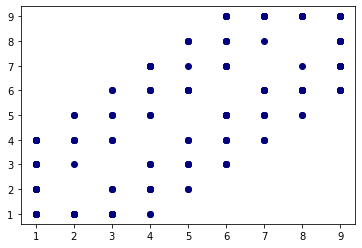

In [148]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_will'])

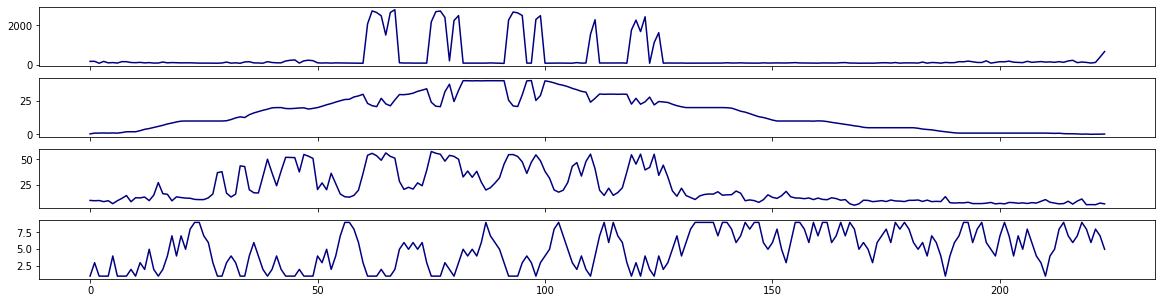

In [149]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])
plt.show()

In [150]:
ff = mf[['time', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_is', 'actual_vm_number_will', 'delta_vm']].copy()

In [151]:
ff.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm
0,20:07:3,122.845000,1,0.4,9.8,1,3.0,2.0
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0


In [152]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [153]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

# metrics[i]=numpy.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

In [154]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [155]:
f1 = ff.copy()
f1['CPU0User%Next'] = f1['CPU0User%'].shift(-1)
f1['CPU0User%Prev'] = f1['CPU0User%'].shift(+1)
f1.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
0,20:07:3,122.845000,1,0.4,9.8,1,3.0,2.0,9.5,NaN
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0,9.7,9.8
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0,8.6,9.5
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0,9.5,9.7
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0,6.6,8.6


In [156]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [157]:
f2 = f1.dropna()
f2.head()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
1,20:07:4,100.906500,3,1.0,9.5,3,1.0,-2.0,9.7,9.8
2,20:07:5,69.350800,1,1.0,9.7,1,1.0,0.0,8.6,9.5
3,20:08:0,103.225818,1,1.1,8.6,1,1.0,0.0,9.5,9.7
4,20:08:1,72.214400,1,1.0,9.5,1,4.0,3.0,6.6,8.6
5,20:08:2,81.134727,4,1.1,6.6,4,1.0,-3.0,9.5,9.5


In [158]:
f2.tail()

,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
218,20:43:5,122.8730,9,0.2,11.2,9,8.0,-1.0,5.6,9.2
219,20:44:0,103.9140,8,0.3,5.6,8,6.0,-2.0,5.7,11.2
220,20:44:5,86.0120,6,0.1,5.7,6,8.0,2.0,5.6,5.6
221,20:59:3,99.2095,8,0.2,5.6,8,7.0,-1.0,7.2,5.7
222,20:59:4,328.9600,7,0.2,7.2,7,5.0,-2.0,6.4,5.6


In [159]:
# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f2[ (f2['delta_vm'] == 0) ].index
f2.drop(indexAge , inplace=True)

f2.tail()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,time,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_is,actual_vm_number_will,delta_vm,CPU0User%Next,CPU0User%Prev
218,20:43:5,122.8730,9,0.2,11.2,9,8.0,-1.0,5.6,9.2
219,20:44:0,103.9140,8,0.3,5.6,8,6.0,-2.0,5.7,11.2
220,20:44:5,86.0120,6,0.1,5.7,6,8.0,2.0,5.6,5.6
221,20:59:3,99.2095,8,0.2,5.6,8,7.0,-1.0,7.2,5.7
222,20:59:4,328.9600,7,0.2,7.2,7,5.0,-2.0,6.4,5.6


In [160]:
# Van-e bárhol NaN

f2['CPU0User%'].isnull().values.any()

for _ in f2.columns:
    print(f2[_].isnull().values.any())

# (3) Check for NaN under an entire DataFrame

print(f2.isnull().values.any())

# (4) Count the NaN under an entire DataFrame

print(f2.isnull().sum())

False
False
False
False
False
False
False
False
False
False
False
time                     0
response_time            0
worker_number            0
request_rate             0
CPU0User%                0
actual_vm_number_is      0
actual_vm_number_will    0
delta_vm                 0
CPU0User%Next            0
CPU0User%Prev            0
dtype: int64


In [161]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [162]:
print(f3['cpu_term1'].min())
print(f3['cpu_term1'].max())

print(f3['cpu_term2'].min())
print(f3['cpu_term2'].max())

2.375
141.89999999999998
-94.6
41.400000000000006


In [163]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [164]:
# Ez a jó

# A jelenlegi a lapján 'CPU0USer' becsüljük a következő értéket 'CPU0User%Next'

f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

# --

_cpu_term = f3[['cpu_term1', 'cpu_term2']]          # jelenlegiekből összeállított term

_cpu_next = f3['CPU0User%Next']                     # a következő mérés értéke

print(_cpu_term.shape, _cpu_next.shape)

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_term, _cpu_next)

rr.score(_cpu_term, _cpu_next)

(194, 2) (194,)


0.8891952695428373

In [165]:
rr.coef_

array([0.87016971, 0.58266153])

In [166]:
rr.intercept_

1.8585627908563147

In [167]:
pred_cpu = rr.predict(_cpu_term)

In [168]:
# Átállítom a színeket

from cycler import cycler
import matplotlib as mpl

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

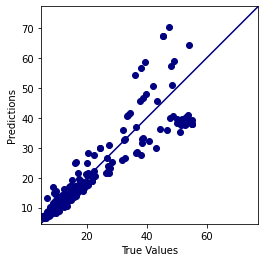

In [169]:
def plot_true_vs_pred(true, pred):
    plt.axes(aspect='equal')
    plt.scatter(true, pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()

plot_true_vs_pred(f3['CPU0User%'], pred_cpu)

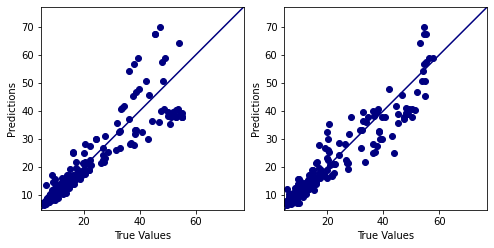

In [170]:
def plot_true_vs_pred_two(true1, pred1, true2, pred2):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(4.0*2, 4.0))
    
    ax0.axis('equal')
    ax0.set_aspect('equal', 'box')
    ax0.scatter(true1, pred1)
    ax0.set_xlabel('True Values')
    ax0.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax0.set_xlim(lims)
    ax0.set_ylim(lims)
    _ = ax0.plot(lims, lims)
    
    ax1.axis('equal')
    ax1.set_aspect('equal', 'box')
    ax1.scatter(true2, pred2)
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predictions')
    _min = np.min((np.min(true1), np.min(pred1)))
    _max = np.max((np.max(true1), np.max(pred1)))
    _min -= _min/10
    _max += _max/10
    lims = [_min, _max]
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    _ = ax1.plot(lims, lims)
    
    plt.show()

plot_true_vs_pred_two(f3['CPU0User%'], pred_cpu, f3['CPU0User%Next'], pred_cpu)

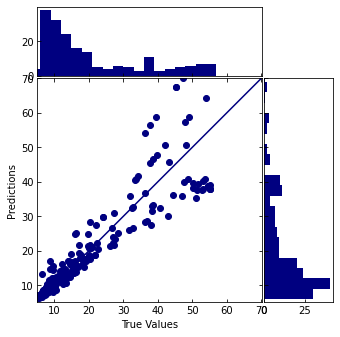

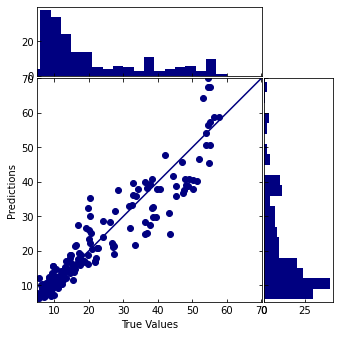

In [171]:
def plot_true_vs_pred_hist(true, pred):

    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4.8, 4.8))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # the scatter plot:
    ax_scatter.scatter(true, pred)

    # now determine nice limits by hand:
    binwidth = 3.00
    lim = np.ceil(np.abs([true, pred]).max() / binwidth) * binwidth
    
    _min = np.min((np.min(true), np.min(pred)))
    _max = np.max((np.max(true), np.max(pred)))
    #_min -= _min/10
    #_max += _max/10
    lims = [_min, _max]
    ax_scatter.plot(lims, lims)
    
    ax_scatter.set_xlim((lims))
    ax_scatter.set_ylim((lims))
    ax_scatter.set_xlabel('True Values')
    ax_scatter.set_ylabel('Predictions')

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(true, bins=bins)
    ax_histy.hist(pred, bins=bins, orientation='horizontal')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())

    plt.show()

plot_true_vs_pred_hist(f3['CPU0User%'].values, pred_cpu)

plot_true_vs_pred_hist(f3['CPU0User%Next'].values, pred_cpu)

In [172]:
# Egy gyors ellenörzés -> hogy vátozna, ha a 'k' (delta_vm) számát én állítanám be

In [173]:
# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [174]:
_cpu_usage = 90
_actual_vm = 2
_delta_vm = 10

_t1 = _cpu_usage * _actual_vm/(_actual_vm + _delta_vm)
_t2 = _cpu_usage * _delta_vm/(_actual_vm + _delta_vm)

_x = np.array([[_t1, _t2]])

print(_x.shape)
print(_x)

_pred = rr.predict(_x)

print(_pred)

# Jó, a model azt mondja, hogy ha 1 darab VM-t hozzáadok akkor csökkenni fog a CPU Usage

(1, 2)
[[15. 75.]]
[58.61072306]


In [175]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
        
    print('score  =', __fit_score)
    print('coef   =', __fit_coef_)
    print('intcpt =', __fit_intercept_)
    
    print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)


score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147



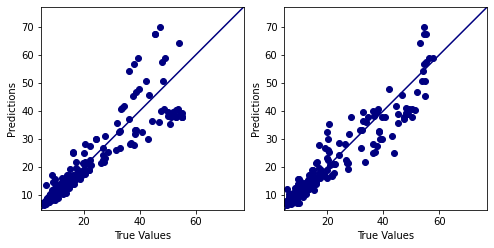

In [176]:
create_model_for_metric('CPU0User%')

score  = 0.32718589389411035
coef   = [0.48716287 0.66909246]
intcpt = 152.98730445692473



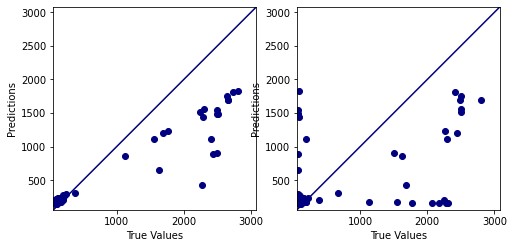

In [177]:
create_model_for_metric('response_time_p95')

score  = 0.970979481399606
coef   = [1.02434361 1.15767578]
intcpt = 0.17655714460201644



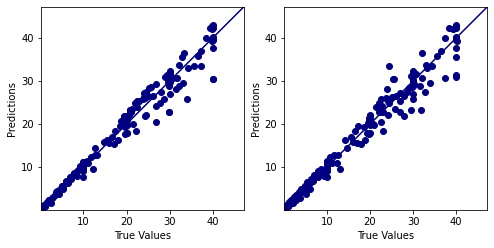

In [178]:
create_model_for_metric('request_rate')

score  = 0.6855208987373714
coef   = [0.81839626 0.98981005]
intcpt = 11.573752182180385



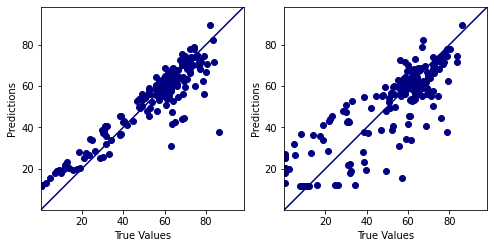

In [179]:
create_model_for_metric('CPU0Idle%')

score  = 0.9068448650757618
coef   = [0.78142833 1.41229115]
intcpt = 1.8321251083110575



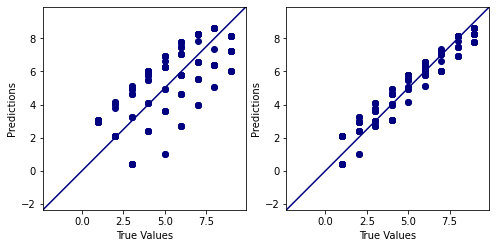

In [180]:
create_model_for_metric('worker_number')

# szerintem valami alapjaiban nem jó

# hogy lehet az, hogy ezt nem képes tökéletesen megmondani?

In [181]:
columnname = 'worker_number'

f1 = mf[[columnname, 'delta_vm']].copy()
__next_name = columnname + 'Next'
__prev_name = columnname + 'Prev'

print(__next_name, __prev_name)

f1[__next_name] = f1[columnname].shift(-1)
f1[__prev_name] = f1[columnname].shift(+1)

#print(f1.head())
#print(f1.tail())

f1 = f1.dropna()

#print(f1.head())
#print(f1.tail())

# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f1[ (f1['delta_vm'] == 0) ].index
f1.drop(indexAge , inplace=True)

#print(f1.head())
#print(f1.tail())

__metric_term1 = columnname + '_term1'
__metric_term2 = columnname + '_term2'

print(__metric_term1, __metric_term2)

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])

t1 = 4 * 4/(4+1) # 3.2
t2 = 4 * 1/(4+1) # 0.8
# ez a két szájbabaszott érték t1 + t2 együtt ki kell hogy adják a bemeneti változót (4)

t1 = 4 * 4/(4+2) # 2.66
t2 = 4 * 2/(4+2) # 1.33
# ez a két szájbabaszott érték t1 + t2 együtt ki kell hogy adják a bemeneti változót (4)

t1 = 2 * 2/(2+1) # 1.33
t2 = 2 * 1/(2+1) # 0.66
# ez a két szájbabaszott érték t1 + t2 együtt ki kell hogy adják a bemeneti változót (2)

# csakhogy engem nem a bemeneti változó érdekel, hanem az hogy mi a következő (w+k)

#print(f1.head())

__metric_term = f1[[__metric_term1, __metric_term2]]
__metric_next = f1[__next_name]

print('----------------------')
print(__next_name)
print('----------------------')

print(f1.head(6))

lr = LinearRegression(fit_intercept=True, positive=False)

print('----------------------')
print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

N = len(f1)

N = 6

__metric_term = __metric_term.values[:N, :]
__metric_next = __metric_next.values[:N]

print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

lr.fit(__metric_term, __metric_next)

print('----------------------')

print('score  =', lr.score(__metric_term, __metric_next))
print('coef_  =', lr.coef_)
print('intcpt =', lr.intercept_)

pred = lr.predict(__metric_term)

print('----------------------')
print(type(pred))
print(pred.shape)

print(pred)

print(__metric_term.dtype)
print(__metric_next.dtype)

print('----------------------')

sajat = 0 + 1.0 * __metric_term[:, 0] + 1.0 * __metric_term[:, 1]

#b[0] = [1, 0, 0]
# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

b = [1, 1, 1]
b = [-0.53221791, -0.43369716, 4.343434343434343]
metrics = 4
w = 4
k = -3
new_metrics = np.dot(b,[(metrics*w)/(w+k),(metrics*k)/(w+k),1])
# print(new_metrics)

print(sajat)
print(__metric_next)

print('----------------------')

# -----------------------------------------------------

import statsmodels.api as sm

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print(results.summary())

print(f'\ncoefficient of determination: {results.rsquared}')
print(f'\nadjusted coefficient of determination: {results.rsquared_adj}')
print(f'\nregression coefficients: {results.params}')    
print(f'predicted response:\n{results.fittedvalues}')
print(f'predicted response:\n{results.predict(_x)}')


worker_numberNext worker_numberPrev
worker_number_term1 worker_number_term2
----------------------
worker_numberNext
----------------------
    worker_number  delta_vm  worker_numberNext  worker_numberPrev  \
1               3      -2.0                1.0                1.0   
4               1       3.0                4.0                1.0   
5               4      -3.0                1.0                1.0   
8               1       1.0                2.0                1.0   
9               2      -1.0                1.0                1.0   
10              1       2.0                3.0                2.0   

    worker_number_term1  worker_number_term2  
1              9.000000            -6.000000  
4              0.250000             0.750000  
5             16.000000           -12.000000  
8              0.500000             0.500000  
9              4.000000            -2.000000  
10             0.333333             0.666667  
----------------------
(194, 2) (194,)
<class '

In [182]:
# Naiv
#  m′ = m · w/(w + k)

In [183]:
columnname = 'worker_number'

f1 = mf[[columnname, 'delta_vm']].copy()
__next_name = columnname + 'Next'
__prev_name = columnname + 'Prev'

print(__next_name, __prev_name)

f1[__next_name] = f1[columnname].shift(-1)
f1[__prev_name] = f1[columnname].shift(+1)

#print(f1.head())
#print(f1.tail())

f1 = f1.dropna()

#print(f1.head())
#print(f1.tail())

# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f1[ (f1['delta_vm'] == 0) ].index
f1.drop(indexAge , inplace=True)

#print(f1.head())
#print(f1.tail())

__metric_term1 = columnname + '_term1'

print(__metric_term1)

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k))

f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])

t1 = 4 * 4/(4+1) # 3.2
t1 = 4 * 4/(4+2) # 2.66
t1 = 2 * 2/(2+1) # 1.33

# csakhogy engem nem a bemeneti változó érdekel, hanem az hogy mi a következő (w+k)

#print(f1.head())

__metric_term = f1[[__metric_term1]]
__metric_next = f1[__next_name]

print('----------------------')
print(__next_name)
print('----------------------')

print(f1.head(6))

lr = LinearRegression(fit_intercept=True, positive=False)

print('----------------------')
print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

N = len(f1)

N = 6

__metric_term = __metric_term.values[:N, :]
__metric_next = __metric_next.values[:N]

print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

lr.fit(__metric_term, __metric_next)

print('----------------------')

print('score  =', lr.score(__metric_term, __metric_next))
print('coef_  =', lr.coef_)
print('intcpt =', lr.intercept_)

pred = lr.predict(__metric_term)

print('----------------------')
print(type(pred))
print(pred.shape)

print(pred)
print(__metric_next)

print(__metric_term.dtype)
print(__metric_next.dtype)

print('----------------------')

# -----------------------------------------------------

import statsmodels.api as sm

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print(results.summary())

print(f'\ncoefficient of determination: {results.rsquared}')
print(f'\nadjusted coefficient of determination: {results.rsquared_adj}')
print(f'\nregression coefficients: {results.params}')    
print(f'predicted response:\n{results.fittedvalues}')
print(f'predicted response:\n{results.predict(_x)}')


worker_numberNext worker_numberPrev
worker_number_term1
----------------------
worker_numberNext
----------------------
    worker_number  delta_vm  worker_numberNext  worker_numberPrev  \
1               3      -2.0                1.0                1.0   
4               1       3.0                4.0                1.0   
5               4      -3.0                1.0                1.0   
8               1       1.0                2.0                1.0   
9               2      -1.0                1.0                1.0   
10              1       2.0                3.0                2.0   

    worker_number_term1  
1              9.000000  
4              0.250000  
5             16.000000  
8              0.500000  
9              4.000000  
10             0.333333  
----------------------
(194, 1) (194,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
----------------------
(6, 1) (6,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
------------------

In [184]:
# Paraszt

# m' = b0 + b1*m + b2*w + b3*k

In [185]:
columnname = 'worker_number'

f1 = mf[[columnname, 'delta_vm']].copy()
__next_name = columnname + 'Next'
__prev_name = columnname + 'Prev'

print(__next_name, __prev_name)

f1[__next_name] = f1[columnname].shift(-1)
f1[__prev_name] = f1[columnname].shift(+1)

#print(f1.head())
#print(f1.tail())

f1 = f1.dropna()

#print(f1.head())
#print(f1.tail())

# Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)

indexAge = f1[ (f1['delta_vm'] == 0) ].index
f1.drop(indexAge , inplace=True)

#print(f1.head())
#print(f1.tail())

__metric_term1 = columnname + '_term1'
__metric_term2 = columnname + '_term2'
__metric_term3 = columnname + '_term3'

print(__metric_term1)

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k))

f1[__metric_term1] = f1[columnname]
f1[__metric_term2] = f1['worker_number']
f1[__metric_term3] = f1['delta_vm']


#print(f1.head())

__metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
__metric_next = f1[__next_name]

print('----------------------')
print(__next_name)
print('----------------------')

print(f1.head(6))

lr = LinearRegression(fit_intercept=True, positive=False)

print('----------------------')
print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

N = len(f1)

N = 100

__metric_term = __metric_term.values[:N, :]
__metric_next = __metric_next.values[:N]

print(__metric_term.shape, __metric_next.shape)
print(type(__metric_term), type(__metric_next))
print('----------------------')

lr.fit(__metric_term, __metric_next)

print('----------------------')

print('score  =', lr.score(__metric_term, __metric_next))
print('coef_  =', lr.coef_)
print('intcpt =', lr.intercept_)

pred = lr.predict(__metric_term)

print('----------------------')
print(type(pred))
print(pred.shape)

print(pred)
print(__metric_next)

print(__metric_term.dtype)
print(__metric_next.dtype)

print('----------------------')

# -----------------------------------------------------

import statsmodels.api as sm

_x = sm.add_constant(__metric_term)

print(type(_x), _x.shape)

model = sm.OLS(__metric_next, _x)

results = model.fit()

print(results.summary())

print(f'\ncoefficient of determination: {results.rsquared}')
print(f'\nadjusted coefficient of determination: {results.rsquared_adj}')
print(f'\nregression coefficients: {results.params}')    
print(f'predicted response:\n{results.fittedvalues}')
print(f'predicted response:\n{results.predict(_x)}')


worker_numberNext worker_numberPrev
worker_number_term1
----------------------
worker_numberNext
----------------------
    worker_number  delta_vm  worker_numberNext  worker_numberPrev  \
1               3      -2.0                1.0                1.0   
4               1       3.0                4.0                1.0   
5               4      -3.0                1.0                1.0   
8               1       1.0                2.0                1.0   
9               2      -1.0                1.0                1.0   
10              1       2.0                3.0                2.0   

    worker_number_term1  worker_number_term2  worker_number_term3  
1                     3                    3                 -2.0  
4                     1                    1                  3.0  
5                     4                    4                 -3.0  
8                     1                    1                  1.0  
9                     2                    2            

In [186]:
from sklearn.linear_model import LinearRegression

def create_model_for_metric_paraszt(columnname: str):
    
    ''' # Paraszt
        # m' = b0 + b1*m + b2*w + b3*k'
    '''
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    __metric_term3 = columnname + '_term3'
    
    f1[__metric_term1] = f1[columnname]
    f1[__metric_term2] = f1['worker_number']
    f1[__metric_term3] = f1['delta_vm']
    
    
    __metric_term = f1[[__metric_term1, __metric_term2, __metric_term3]]
    __metric_next = f1[__next_name]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)
    
    # _ = joblib.dump(lr, './lr/lr_' + columnname + '.joblib', compress=9)

    __fit_score = rr.score(__metric_term, __metric_next)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    print(__fit_score)
    print(__fit_coef_)
    print(__fit_intercept_)
    
    print()
    
    # Uristen geci bazmeg, hogy én mekkora fasz vagyok
#    plot_true_vs_pred(f1[columnname].values, __pred_metric)
    # Ez itt a before vs pred_next
    # Nem pedig a next vs pred_next
    
#    plot_true_vs_pred(f1[__next_name].values, __pred_metric)
    # ugyan ez
    # plot_true_vs_pred(__metric_next, __pred_metric)

# A fenti kettő helyett van most ez az egy -> hogy egymás mellett legyenek
    plot_true_vs_pred_two(f1[columnname].values, __pred_metric, f1[__next_name].values, __pred_metric)


score  = 0.6855208987373714
coef   = [0.81839626 0.98981005]
intcpt = 11.573752182180385



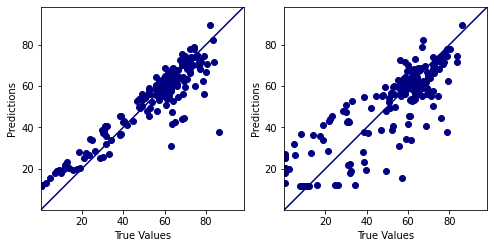

In [187]:
# régi (original)
create_model_for_metric('CPU0Idle%')

0.7482117413410216
[0.75920143 1.67257522 4.70240201]
4.058703754570381



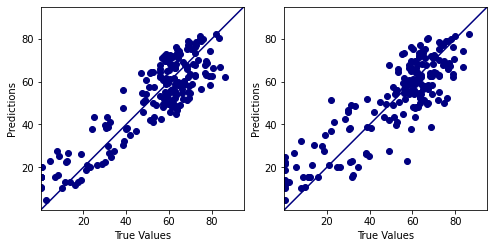

In [188]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0Idle%')

score  = 0.8891952695428373
coef   = [0.87016971 0.58266153]
intcpt = 1.8585627908563147



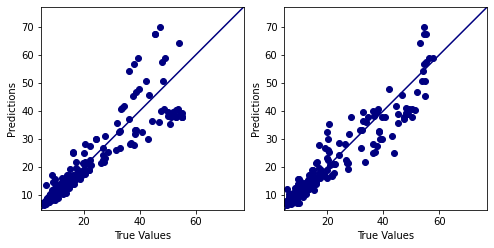

In [189]:
# régi (original)
create_model_for_metric('CPU0User%')

0.8413400205594682
[ 0.83857748 -0.89835191 -2.88298166]
8.014876411389482



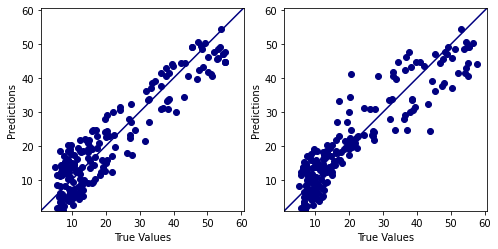

In [190]:
# paraszt (new)
create_model_for_metric_paraszt('CPU0User%')

score  = 0.9068448650757618
coef   = [0.78142833 1.41229115]
intcpt = 1.8321251083110575



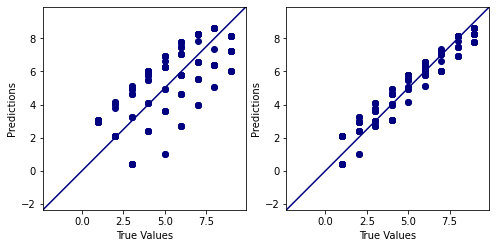

In [191]:
# régi (original)
create_model_for_metric('worker_number')

1.0
[0.5 0.5 1. ]
-8.881784197001252e-16



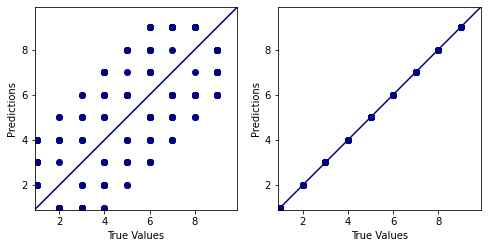

In [192]:
# paraszt (new)
create_model_for_metric_paraszt('worker_number')

In [193]:
# Hát ha az új plottot a valósat, a jót, a helyeset nézem (akármelyik modellel is) a kép már nem annyira rózsás

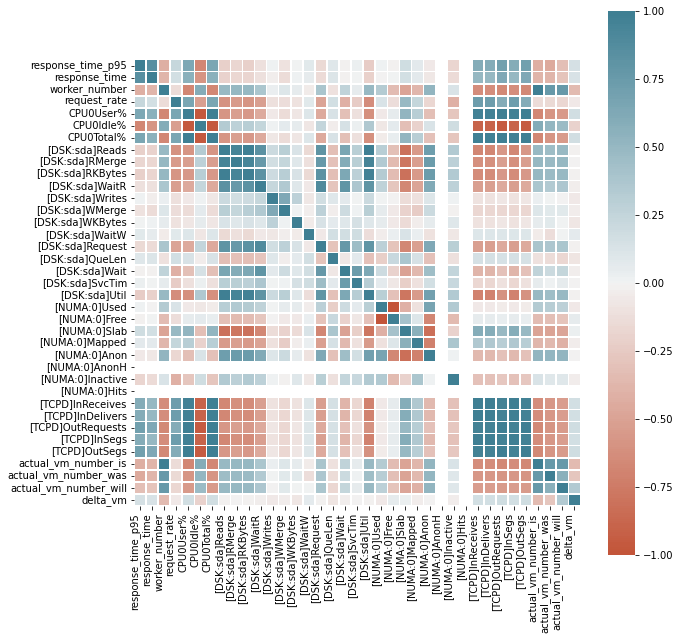

In [195]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = mf.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [88]:
input_variables = ['CPU0User%', '[DSK:sda]WKBytes', 'request_rate', 'response_time', 'worker_number']

In [89]:
mf[input_variables].corr()

,CPU0User%,[DSK:sda]WKBytes,request_rate,response_time,worker_number
CPU0User%,1.000000,-0.073444,0.649597,0.557478,-0.668593
[DSK:sda]WKBytes,-0.073444,1.000000,-0.101448,0.017907,0.053548
request_rate,0.649597,-0.101448,1.000000,0.156768,-0.137005
response_time,0.557478,0.017907,0.156768,1.000000,-0.388163
worker_number,-0.668593,0.053548,-0.137005,-0.388163,1.000000


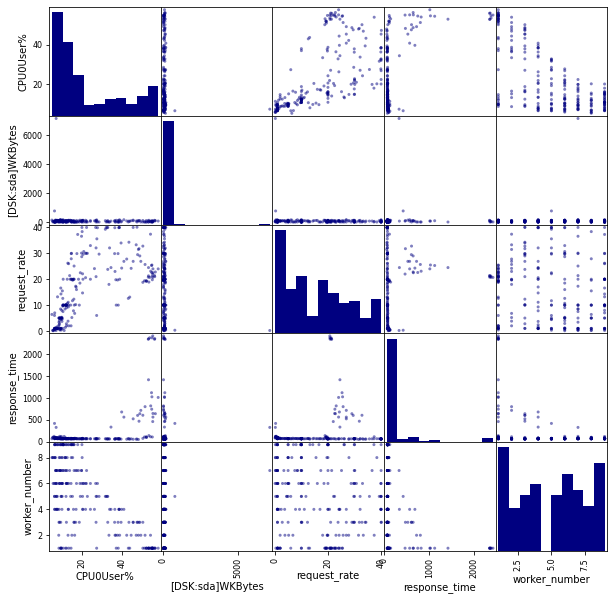

In [196]:
from pandas.plotting import scatter_matrix

scatter_matrix(mf[input_variables], figsize=(10,10))
plt.show()

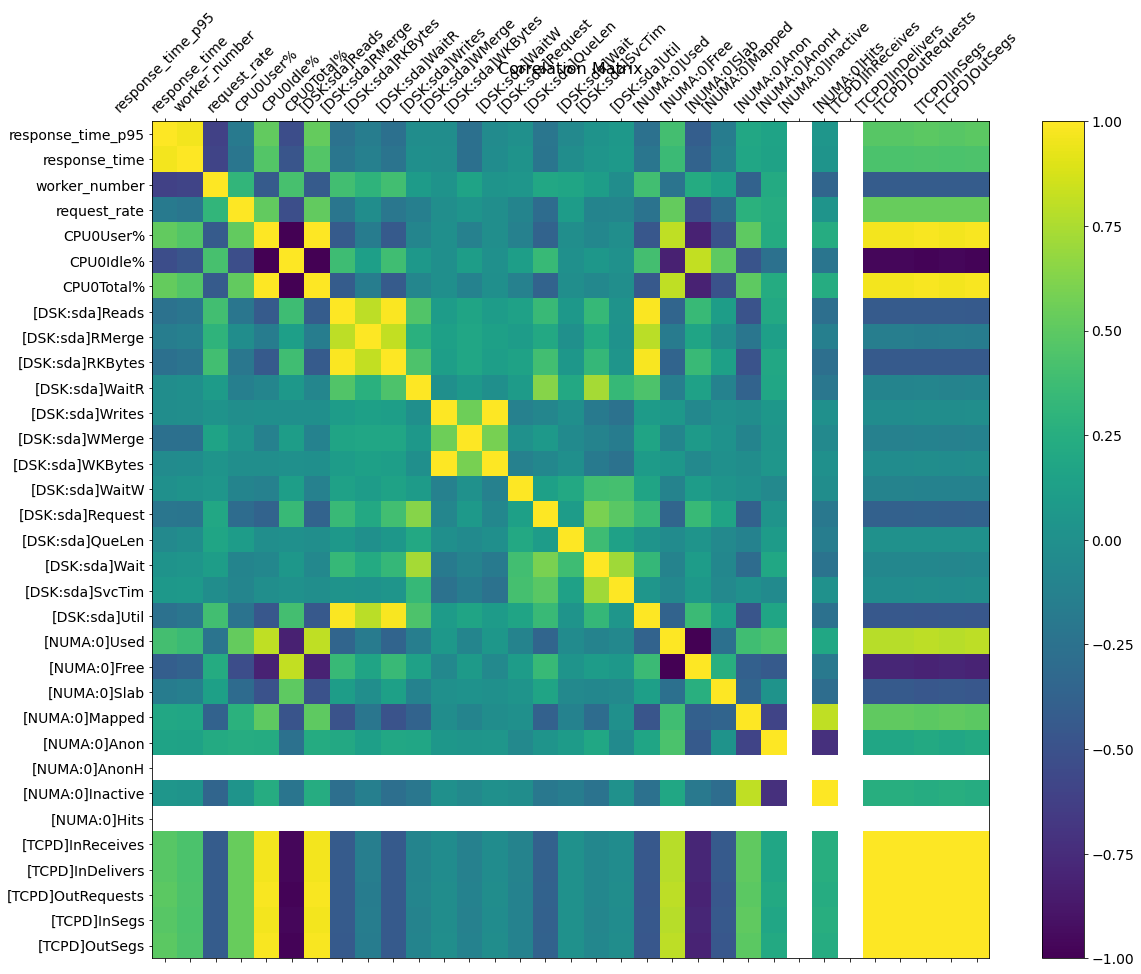

In [91]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

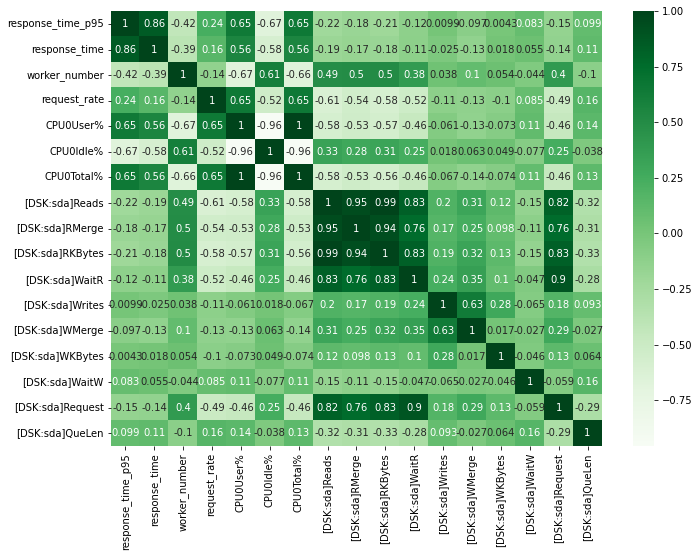

In [200]:

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(18, 18))
df= mf.iloc[: , [3,4,5,6,7,8,9,10,11,12,13,14,17]].copy()

df = mf.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

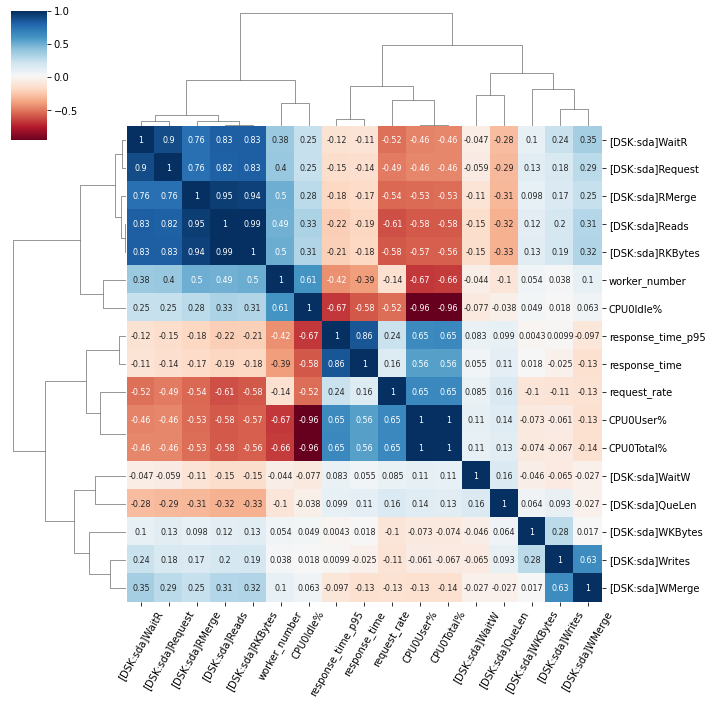

In [201]:
g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   cmap   = 'RdBu', 
                   annot  = True, 
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

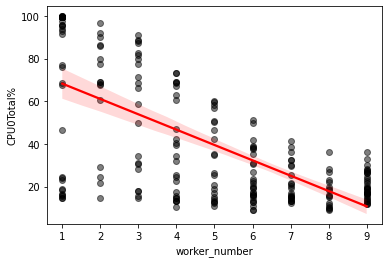

[]

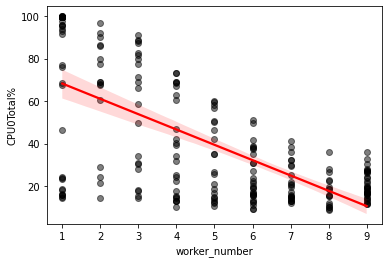

In [95]:
sns.regplot(x=mf['worker_number'],
            y=mf['CPU0Total%'],
            scatter_kws={
                "color": "black",
                "alpha": 0.5
            },
            line_kws={"color": "red"})
plt.show()

# ugyan az
sns.regplot(x='worker_number',
            y='CPU0Total%',
            data=mf,
            scatter_kws={
                "color": "black",
                "alpha": 0.5
            },
            line_kws={"color": "red"})
plt.plot()

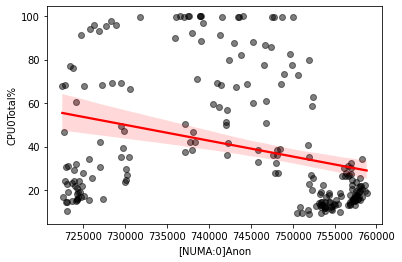

In [96]:
sns.regplot(x = mf['[NUMA:0]Anon'], y = mf['CPU0Total%'],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 95)
plt.show()

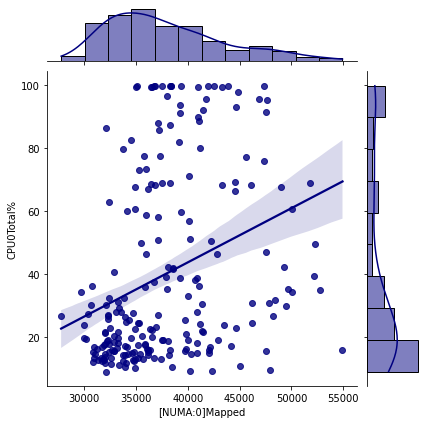

In [98]:
sns.jointplot(x='[NUMA:0]Mapped', y='CPU0Total%', data=mf, kind='reg');

In [239]:
def pp(cn: str, cm: str):
    sns.jointplot(x=cn, y=cm, data=mf, kind='reg')

cn = mf.columns.difference(mf.select_dtypes('object').columns)
cm = mf.columns.difference(mf.select_dtypes('object').columns)

interact(pp, cn=cn, cm=cm);

interactive(children=(Dropdown(description='cn', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DSK:sda]Qu…

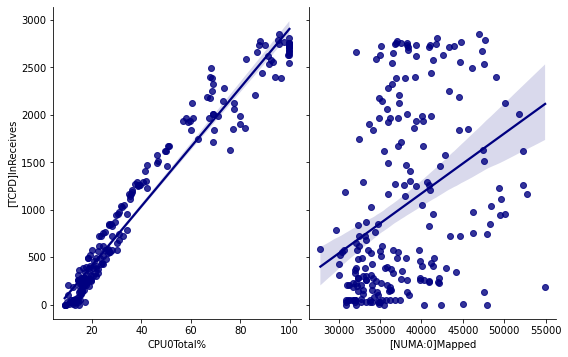

In [99]:
sns.pairplot(mf, x_vars=['CPU0Total%', '[NUMA:0]Mapped'], y_vars=['[TCPD]InReceives'],
             height=5, aspect=.8, kind='reg');

In [105]:
# Nézzük melyik metrikákkal correlál a worker_number és a delta_vm

# valójában a delta_m delta_vm érdekelne

In [240]:
an = mf.copy()

# Remove column name [...]
an = an.drop(['worker_give_metrics'], axis=1)
an = an.drop(['actual_vm_number_is', 'actual_vm_number_was', 'actual_vm_number_will'], axis=1)

# minden metrikára megcsinálni a nextet és kiszámolni a delta metrikát

column_names = an.columns

for columnname in column_names:

    __next_name = columnname + 'Nxt'

    an[__next_name] = an[columnname].shift(-1)

indexAge = an[ (an['delta_vm'] == 0) ].index
an.drop(indexAge , inplace=True)
an = an.dropna()


for columnname in column_names:
    
    if an[columnname].values.dtype != object:
        __next_name = columnname + 'Nxt'
        __delta_next_name = columnname + 'NextDelta'
        an[__delta_next_name] = an[__next_name] - an[columnname]

# an = an[an.columns.drop(list(an.filter(regex='Nxt')))]

an.head()

,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,[DSK:sda]Reads,...,[NUMA:0]AnonNextDelta,[NUMA:0]AnonHNextDelta,[NUMA:0]InactiveNextDelta,[NUMA:0]HitsNextDelta,[TCPD]InReceivesNextDelta,[TCPD]InDeliversNextDelta,[TCPD]OutRequestsNextDelta,[TCPD]InSegsNextDelta,[TCPD]OutSegsNextDelta,delta_vmNextDelta
0,20:07:33,20:07:3,170.48660,122.845000,1,0.4,9.8,69.9,15.9,112.5,...,-1707.2,0.0,-5654.0,0.0,-51.7,-51.7,-51.9,-51.2,-51.3,-4.0
1,20:07:42,20:07:4,173.23785,100.906500,3,1.0,9.5,69.5,15.5,121.6,...,-1496.0,0.0,-2483.2,0.0,103.9,103.9,104.0,103.9,104.0,2.0
4,20:08:11,20:08:1,95.18005,72.214400,1,1.0,9.5,82.2,16.3,20.8,...,-1340.4,0.0,-1944.0,0.0,-153.6,-153.6,-154.5,-153.6,-154.5,-6.0
5,20:08:21,20:08:2,109.47150,81.134727,4,1.1,6.6,86.3,10.5,33.2,...,570.8,0.0,4421.6,0.0,120.9,120.9,128.9,120.4,128.4,3.0
8,20:08:51,20:08:5,153.55670,81.443900,1,2.0,14.6,69.9,24.1,73.3,...,-947.6,0.0,-784.4,0.0,-176.1,-176.1,-237.2,-176.1,-237.3,-2.0


In [241]:
an.columns

Index(['write_to_csv_time', 'time', 'response_time_p95', 'response_time',
       'worker_number', 'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%',
       '[DSK:sda]Reads',
       ...
       '[NUMA:0]AnonNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]InactiveNextDelta', '[NUMA:0]HitsNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutSegsNextDelta', 'delta_vmNextDelta'],
      dtype='object', length=106)

In [242]:
tmp = an[['worker_number', 'delta_vm', 'CPU0Total%', 'CPU0Total%Nxt', 'CPU0Total%NextDelta']]

tmp.head()

,worker_number,delta_vm,CPU0Total%,CPU0Total%Nxt,CPU0Total%NextDelta
0,1,2.0,15.9,15.5,-0.4
1,3,-2.0,15.5,15.7,0.2
4,1,3.0,16.3,10.5,-5.8
5,4,-3.0,10.5,14.8,4.3
8,1,1.0,24.1,14.5,-9.6


In [110]:
# Oké eddig jó

# delta_vm-re agregálni a delta_metrikát
an.groupby(['delta_vm'])['CPU0Total%NextDelta'].mean()

delta_vm
-3.0    6.882143
-2.0    2.737500
-1.0    1.645161
 1.0   -3.008333
 2.0   -4.220000
 3.0   -5.565714
Name: CPU0Total%NextDelta, dtype: float64

In [111]:
# Oké eddig jó

# erre kéne csinálni valami ANOVA elemzés és F-statistikát

In [112]:
# Oké eddig jó

# lehet egyszerre több változóra is megcsinálni az aggregációt
an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()

,CPU0Total%NextDelta,CPU0User%NextDelta
delta_vm,,
-3.0,6.882143,7.050000
-2.0,2.737500,2.768750
-1.0,1.645161,1.658065
1.0,-3.008333,-3.150000
2.0,-4.220000,-4.012000
3.0,-5.565714,-5.691429


In [113]:
# Oké eddig jó

# lehet több változó alapján is aggregálni
an.groupby(['delta_vm', 'worker_number'])['CPU0Total%NextDelta'].mean()

delta_vm  worker_number
-3.0      4                 8.400000
          5                10.560000
          6                 5.733333
          7                 4.633333
          8                 7.433333
          9                 3.450000
-2.0      3                 7.500000
          4                 3.500000
          5                 2.750000
          6                 7.000000
          7                 2.600000
          8                -2.266667
          9                -1.320000
-1.0      2                 0.428571
          3                -0.066667
          4                -0.025000
          5                 3.400000
          6                 5.733333
          7                -1.033333
          8                 1.750000
          9                 3.420000
 1.0      1                -5.400000
          2                -2.200000
          3                -0.150000
          4                -1.420000
          5                -6.800000
          6   

In [114]:
# Oké eddig jó

# Ilyet is lehet (avg, min, max, std)
aa = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].mean()
bb = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].min()
cc = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].max()
dd = an.groupby(['delta_vm'])[['CPU0Total%NextDelta', 'CPU0User%NextDelta']].std()
aa.columns = ['CPU0Total%mean', 'CPU0User%mean']
bb.columns = ['CPU0Total%min', 'CPU0User%min']
cc.columns = ['CPU0Total%max', 'CPU0User%max']
dd.columns = ['CPU0Total%std', 'CPU0User%std']

ff = pd.concat([aa, bb, cc, dd], axis=1)

ff.head()

,CPU0Total%mean,CPU0User%mean,CPU0Total%min,CPU0User%min,CPU0Total%max,CPU0User%max,CPU0Total%std,CPU0User%std
delta_vm,,,,,,,,
-3.0,6.882143,7.050000,-3.0,-1.9,43.5,44.0,10.001780,9.882776
-2.0,2.737500,2.768750,-18.1,-18.0,52.9,53.5,10.751136,10.830049
-1.0,1.645161,1.658065,-3.2,-3.8,15.7,16.1,3.842208,3.958600
1.0,-3.008333,-3.150000,-27.9,-28.0,3.7,4.4,7.395117,7.371272
2.0,-4.220000,-4.012000,-23.0,-22.7,2.2,3.3,6.367038,6.529824


In [115]:
an.groupby(['delta_vm']).agg({
    'CPU0Total%NextDelta': ['mean', 'min', 'max', 'std'],
    'CPU0User%NextDelta': ['mean', 'min', 'max', 'std']
})

CPU0Total%NextDelta                        CPU0User%NextDelta        \
                        mean   min   max        std               mean   min   
delta_vm                                                                       
-3.0                6.882143  -3.0  43.5  10.001780           7.050000  -1.9   
-2.0                2.737500 -18.1  52.9  10.751136           2.768750 -18.0   
-1.0                1.645161  -3.2  15.7   3.842208           1.658065  -3.8   
 1.0               -3.008333 -27.9   3.7   7.395117          -3.150000 -28.0   
 2.0               -4.220000 -23.0   2.2   6.367038          -4.012000 -22.7   
 3.0               -5.565714 -39.9   1.7   9.159660          -5.691429 -41.6   

                           
           max        std  
delta_vm                   
-3.0      44.0   9.882776  
-2.0      53.5  10.830049  
-1.0      16.1   3.958600  
 1.0       4.4   7.371272  
 2.0       3.3   6.529824  
 3.0       2.5   9.330228

In [243]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

#

#

# Ez egy nagyon jó plott.

# A segítségével azt tudom ábrázolni, hogy melyik metrika az amelyik a delta_vm fényében változik.

# Tehát melyik metrika az amelyikre a vm-ek számának változtatása hatással volt.
# Vagyis amelyik a vm szám változására változott.

# Ezáltal kiszíűrhetőek azok a metrikák, amelyekre a vm szám változtatás egyáltalán nem volt hatással ->
# tehát nem is nagyon kéne belevennem az elemzésbe.

In [258]:
def pp(cn: str, cm: str):
    sns.jointplot(x=cn, y=cm, data=an, kind='reg')

cn = an.filter(regex=("delta*")).columns
cm = an.filter(regex=("Next*")).columns

interact(pp, cn=cn, cm=cm);

interactive(children=(Dropdown(description='cn', options=('delta_vm', 'delta_vmNxt', 'delta_vmNextDelta'), val…

In [327]:

# Picit egyszerűbben meg leht csinálni úgy is, hogy lekérek egy correlációs mátrixot csak a delta_vm -> next_mr-ekre

cm = an.filter(regex='Next*|delta_vm')

df = an.loc[:, an.columns.isin(cm)]

df = df.drop(['delta_vmNxt', 'delta_vmNextDelta'], axis=1)

cr = df.corr()

cr = cr.sort_values(by=['delta_vm'], ascending=False)

cr = cr.iloc[:, 0:2]

cr = cr.dropna(axis=0)

cr

,delta_vm,response_time_p95NextDelta
delta_vm,1.000000,-0.123395
worker_numberNextDelta,1.000000,-0.123395
CPU0Idle%NextDelta,0.605033,-0.301381
request_rateNextDelta,0.258248,-0.705048
[NUMA:0]AnonNextDelta,0.166498,0.085022
[DSK:sda]UtilNextDelta,0.155898,0.181888
[DSK:sda]RKBytesNextDelta,0.131367,0.162751
[NUMA:0]InactiveNextDelta,0.125271,0.045844
[DSK:sda]ReadsNextDelta,0.119396,0.180092
[NUMA:0]UsedNextDelta,0.113058,-0.052337


In [328]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

#

#

In [335]:
an.columns

Index(['write_to_csv_time', 'time', 'response_time_p95', 'response_time',
       'worker_number', 'request_rate', 'CPU0User%', 'CPU0Idle%', 'CPU0Total%',
       '[DSK:sda]Reads',
       ...
       '[NUMA:0]AnonNextDelta', '[NUMA:0]AnonHNextDelta',
       '[NUMA:0]InactiveNextDelta', '[NUMA:0]HitsNextDelta',
       '[TCPD]InReceivesNextDelta', '[TCPD]InDeliversNextDelta',
       '[TCPD]OutRequestsNextDelta', '[TCPD]InSegsNextDelta',
       '[TCPD]OutSegsNextDelta', 'delta_vmNextDelta'],
      dtype='object', length=106)

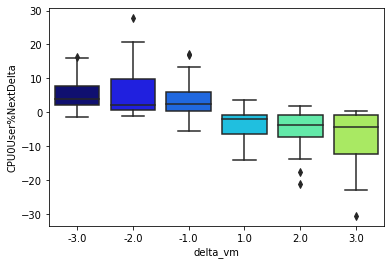

In [336]:
sns.boxplot(x='delta_vm', y='CPU0User%NextDelta', data=an)

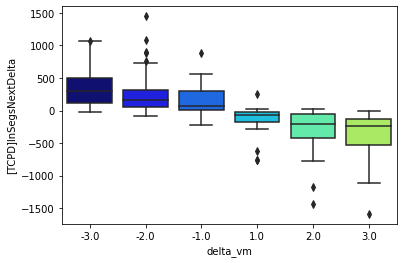

In [337]:
sns.boxplot(x='delta_vm', y='[TCPD]InSegsNextDelta', data=an)

In [116]:
#

#

# Itt tartok éppen

# Azon dolgozom, hogy a delta_metrika értékeket (delta_vm) fényében össze tudjam hasonlítani az egyes testek között

# Az egyes testek az egyes TestXX mappákban vannak

#

#

In [212]:
def cc(columnname: str):
    create_model_for_metric(columnname)
    create_model_for_metric_paraszt(columnname)

In [213]:
mf.columns.difference(mf.select_dtypes('float64').columns)

Index(['actual_vm_number_is', 'time', 'worker_give_metrics', 'worker_number',
       'write_to_csv_time'],
      dtype='object')

In [214]:
cn = mf.columns.difference(mf.select_dtypes('object').columns)

# interact(create_model_for_metric, columnname=cn);

interact(cc, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('CPU0Idle%', 'CPU0Total%', 'CPU0User%', '[DS…

In [121]:
# Csak kiviből kipróbálom, hogy milyen érkeket adna az ő linreg beállításaikkal (nem tom melyik, melyik metric)

bvalues = [[1,0,0],
           [0.9448,0.1072,3.0954],
           [0.8954,0.3220,42.3307],
           [1.1008,0.4017,-20.2569],
           [1.0589,0.5713,1.5306],
           [0.6142,0.1733,26.5175],
           [0.9222,0.2059,1.1572],
           [0.7489,0.2851,18.4977]]

# metrics[i]=np.dot(bvalues[i],[(metrics[i]*w)/(w+k),(metrics[i]*k)/(w+k),1])

metrics = [90, 90, 90, 90, 90, 90]
w = 3
k = 1

m = 1

_cpu = np.dot(bvalues[m],[(metrics[m]*w)/(w+k),(metrics[m]*k)/(w+k),1])

print(_cpu)

# Mivel nem tudom, hogy melyik együtthatótk tartoznak a cpu-hoz ezért nem merem biztosan kijelenteni,
# de úgy tűnik, hogy náluk ha egy VM-t hozzáadok akkor csökken a CPU usage érték és nem nő.

# Ennek lehet az az oka is, hogy a Fibonacci CPU REST API-n tanítottam

69.2814


In [122]:

# Az a meglátásom, hogy vannak olyan metrikák amelyeknek a lineáris regressziós becslése katasztrófálisan szar.

# Ezért ezeket a változókat még véletlenül sem szabad bevennem a Neurális háló modellbe


In [123]:

# Csak úgy mondom, hogy gyárilag a Request Rate értéket is becsülni kell a linreg modellel

# Ennek az az oka, hogy mivel elosztott terhelés van, valóban előforudhat és elő is fordul,
# hogy ha egy új VM-t becsatolok a rendszerbe akkor az adott gépre kevesebb bejövő kérés
# fog jutni.


In [124]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')

# sets seeds for base-python, numpy and tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [125]:

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH']

input_variables = ['CPU1Idle%', 
                   'CPU1Total%', 
                   '[DSK:sda]Reads', 
                   '[DSK:sda]RMerge', 
                   '[DSK:sda]RKBytes', 
                   '[DSK:sda]WaitR', 
                   '[DSK:sda]Writes', 
                   '[DSK:sda]WMerge', 
                   '[DSK:sda]WaitW', 
                   '[DSK:sda]SvcTim']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WaitW',
                   '[NUMA:0]AnonH']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   '[DSK:sda]WaitR',
                   '[DSK:sda]Writes',
                   '[DSK:sda]WMerge',
                   '[DSK:sda]WKBytes',
                   '[DSK:sda]WaitW',
                   '[DSK:sda]Request',
                   '[DSK:sda]QueLen',
                   '[DSK:sda]Wait',
                   '[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   '[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   '[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   '[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

input_variables = ['request_rate',
                   'CPU0User%',
                   '[DSK:sda]Reads',
                   '[DSK:sda]RMerge',
                   '[DSK:sda]RKBytes',
                   #'[DSK:sda]WaitR',
                   #'[DSK:sda]Writes',
                   #'[DSK:sda]WMerge',
                   #'[DSK:sda]WKBytes',
                   #'[DSK:sda]WaitW',
                   #'[DSK:sda]Request',
                   #'[DSK:sda]QueLen',
                   #'[DSK:sda]Wait',
                   #'[DSK:sda]SvcTim',
                   '[DSK:sda]Util',
                   '[NUMA:0]Used',
                   '[NUMA:0]Free',
                   #'[NUMA:0]Slab',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Anon',
                   #'[NUMA:0]AnonH',
                   '[NUMA:0]Inactive',
                   #'[NUMA:0]Hits',
                   '[TCPD]InReceives',
                   '[TCPD]InDelivers',
                   '[TCPD]OutRequests',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Csak a jó linregesek (17.8%)
input_variables = ['request_rate',
                   'CPU0Idle%',
                   '[NUMA:0]Anon',
                   '[NUMA:0]Mapped',
                   '[NUMA:0]Inactive',
                   '[TCPD]InSegs',
                   '[TCPD]OutSegs']

# Fent -> hiába tökéletes a model az actionok után hülyeségeket mond

# A kevesebb több (24.8%)
input_variables = ['request_rate',
                   'CPU0User%',
                   '[TCPD]OutSegs']

# Fent -> még akkor is ha ez a model rosszabb becslést ad az actionok után sokkal jobb



train_features = mf[input_variables]

# train_labels = mf[['response_time_p95']]

train_labels = mf[['response_time']]


normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

with np.printoptions(precision=2, suppress=True):
    print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print('Normalized   :', normalizer(first).numpy())

first_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(30, activation='tanh'),
    tf.keras.layers.Dense(15, activation='ReLU'),
    layers.Dense(units=1)
])

first_model.summary()

first_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


2023-05-07 16:54:21.279061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-07 16:54:21.279181: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-07 16:54:21.279232: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lb): /proc/driver/nvidia/version does not exist
2023-05-07 16:54:21.279954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[10.75 69.22 21.6 ]]
First example: [[ 1.1 28.9  7.8]]
Normalized   : [[-0.98 -1.13 -1.23]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 30)                120       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 608
Trainable params: 601
Non-trainable params: 7
_________________________________________________________________


In [126]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [RT]')
    plt.legend()
    plt.grid(True)

2023-05-07 16:54:37.343806: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:54:42.251416: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:54:52.183987: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:54:56.574298: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:55:00.092568: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:55:00.133515: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:55:12.290306: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 16:55:22.385198: W tensorflow/core/data/root_dataset.cc:26

CPU times: user 1min 2s, sys: 3.26 s, total: 1min 5s
Wall time: 1min 22s


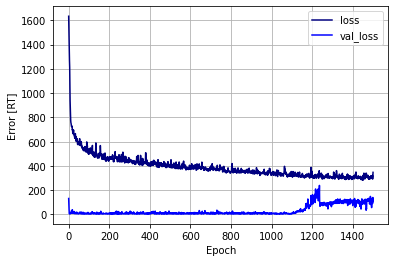

In [127]:
%%time
history = first_model.fit(
    train_features,
    train_labels,
    epochs = 1500,
    # batch_size = 300,
    verbose = 0,
    validation_split = 0.05)

plot_loss(history)

In [128]:
predicted_labels = first_model.predict(train_features)

7/7 [==============================] - 0s 2ms/step


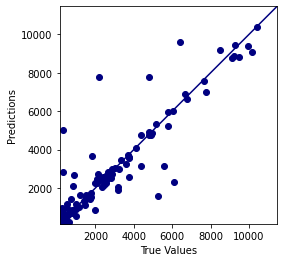

In [129]:
plot_true_vs_pred(train_labels.values, predicted_labels)

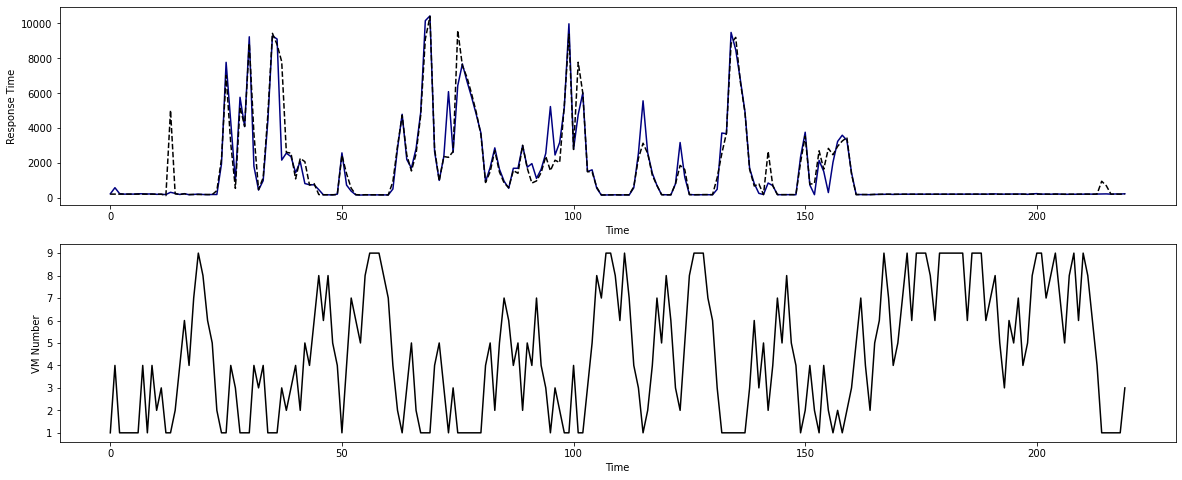

In [130]:
def plot_timeseries(train_labels, predicted_labels):
    
    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    ax1.plot(mf['response_time'], color = 'C0')
    # ax1.plot(mf['response_time_p95'], color = 'C1')
    
    # ax1.plot(train_labels, color = 'orange')
    ax1.plot(predicted_labels, color = 'black', ls = '--')

    # ax2 = ax1.twinx()

    # ax2.plot(mf['request_rate'], color = 'C2')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    # ax2.set_ylabel('Request Rate')

    ax3.plot(mf['worker_number'], color = 'black')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')

    plt.show()

plot_timeseries(train_labels.values, predicted_labels)

In [131]:
# Nem vagyok megelégedve az eredménnyel, mert:

# - a neurális háló nagyon érzékeny mindenre így nehéz összehasonlítanom az eredményeket.

# - nem sikerült még kiválasztanom a jó bemeneti változókat

# Hogy tovább tudjak lépni, most ezektől eltenkintek és elkészítem az a sub-routint ami kiszámolja a becslült
# válaszidőket az egyes fel-, leskálázási értékekehze.

In [132]:
print(input_variables)

['request_rate', 'CPU0User%', '[TCPD]OutSegs']


In [136]:
# mindegyikhez elkészíteni hogy mi lenne a fel leskálázás utáni értéke

A = [i for i in range(-7, 8, 1)]

print(A)

# -2.
# inicalizálni egy üres dictianary-t a dict(action, predicted_response_time) pároknak
r = []
al = []
rl = []

# -1.
# kiválasztani, hogy milyen értéket mérek aktuális metrikákként
# ideiglenesen az mf utolsó értékei lesznek a bemenők

__N = -80

__current_response_time = mf['response_time_p95'].values[__N]
__last_metrics = mf[input_variables].values[__N]
__w = mf['worker_number'].values[__N]

print('-----------------------------------------')
print('__last_metrics -> vagyis a current values')
with np.printoptions(precision=2, suppress=True):
    print(__last_metrics)
print(colored('__current_rt -> \t' + str(__current_response_time), 'red'))
print(colored('__w -> worker_number \t' + str(__w), 'red'))

print('-----------------------------------------')

print(input_variables)
print('-----------------------------------------')

for a in A:
    
    # Ez kell, hogy a VM szám (w) ne legyen 0
    if __w + a != 0:
    
        # 0.
        # inicializálni egy üres tömböt az input_variable változónak
        _new_train_features = np.zeros((1, mf[input_variables].shape[1]))


        # 1.
        # minden metrikára kiszámolni
        for i, metric in enumerate(input_variables):
            # print(i, metric)
            if metric != 'worker_number':

                # 2.
                # megcsinálni a linreg modelt az adott metrikára (tanítás)
                __metric_term, __metric_next = create_term_for_metric(metric)
                __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)
                
                # 3.
                # elmenetni az adott modelt (amit nem használok sehol)
                # _ = joblib.dump(__lr_model, './lr/lr_' + metric + '.joblib', compress=9)
                
                # 3.
                # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                # print('---a metrica értékének becsése (value, w, k alapján ---')
                # print(__metric_term)
                # print(metric)
                # print(a)
                # print('------------------')
                __pred_metric = __lr_model.predict(__metric_term)
                
                # 4.
                # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                _new_train_features[0, i] = __pred_metric
                # print(_new_train_features)
            
                
        # 5.
        # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
        with np.printoptions(precision=2, suppress=True):
            print(_new_train_features)
        
        # 6.
        # a neurális háló model segítségével megbecsülöm a válaszidőt
        
        __predicted_response_time = first_model.predict(_new_train_features, verbose = 0)
        
        with np.printoptions(precision=2, suppress=True):
            print('action = ', a, ' --> rt --> ', __predicted_response_time, '\n')


[-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]
-----------------------------------------
__last_metrics -> vagyis a current values
[19.4 97.7 33.9]
__current_rt -> 	500.23685
__w -> worker_number 	3
-----------------------------------------
['request_rate', 'CPU0User%', '[TCPD]OutSegs']
-----------------------------------------
[[28.88 89.4  28.31]]
action =  -7  --> rt -->  [[186.64]] 

[[30.13 88.49 27.69]]
action =  -6  --> rt -->  [[186.71]] 

[[32.64 86.68 26.45]]
action =  -5  --> rt -->  [[186.75]] 

[[40.18 81.26 22.74]]
action =  -4  --> rt -->  [[189.02]] 

[[ 10.04 102.96  37.6 ]]
action =  -2  --> rt -->  [[2588.25]] 

[[17.57 97.53 33.88]]
action =  -1  --> rt -->  [[1126.07]] 

[[20.09 95.72 32.65]]
action =  0  --> rt -->  [[688.65]] 

[[21.34 94.82 32.03]]
action =  1  --> rt -->  [[338.13]] 

[[22.09 94.28 31.66]]
action =  2  --> rt -->  [[193.21]] 

[[22.6  93.92 31.41]]
action =  3  --> rt -->  [[190.95]] 

[[22.96 93.66 31.23]]
action =  4  --> rt -->  [[190.

In [137]:
from sklearn.linear_model import LinearRegression

def create_term_for_metric(columnname: str):
    
    f1 = mf.copy()
    __next_name = columnname + 'Next'
    __prev_name = columnname + 'Prev'

    f1[__next_name] = f1[columnname].shift(-1)
    f1[__prev_name] = f1[columnname].shift(+1)
    
    f1 = f1.dropna()

    # Az lenne a korrekt ha kidobnám azokat ahol nem volt skálázás (delta_vm == 0)
    
    indexAge = f1[ (f1['delta_vm'] == 0) ].index
    f1.drop(indexAge , inplace=True)

    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[columnname] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[columnname] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_term = f1[[__metric_term1, __metric_term2]]
    __metric_next = f1[__next_name]
    
    return __metric_term, __metric_next

def create_term_for_prediction(value: float, w: int, k: int):
    
    __metric_term1 = value * w/(w+k)
    __metric_term2 = value * k/(w+k)
    
    __metric_term = np.array([[__metric_term1, __metric_term2]])
    
    return __metric_term

def calc_pred_for_metric(__metric_term, __metric_next):

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_term, __metric_next)

    __fit_score = rr.score(__metric_term, __metric_next)
    __fit_coef_ = rr.coef_
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_term)
    
    return rr
    
    

In [138]:
# Az egy jó jel, hogyha nem változtatná a vm-ek számát vagyis a k=0, akkor a linreg becsés alapján
# adott új metrika érétkek
# és az ezek alapján adott becslése a válaszidőnek
# nagyon közel áll az éppen mért válaszidő értékéhez,
# ez egy nagyon jó jel, jele annak, hogy a két model jól működik

In [139]:
# A következő feladat

# Ha jól látom ez a Train10 könyvtár

# Tehát ebbe a könyvtárba megírni azt, hogy a feltanított modell alapján skálázzon,.

# És fontos az is, hogy ugyan itt legyen letárolva a terhelést végző jmx profil is,
# hogy ugyan az alapján tudjam terhelni ami alapján tanítottam.
# (egyezzenek a végpontok, stb.)

In [140]:
# Teendő 1

# Kiexportálni az itt feltanított model.

# Keras

first_model.save(os.getcwd())

# first_model.save('model.h5')


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train10/assets


INFO:tensorflow:Assets written to: /home/ubuntu/Scaler/Train/Train10/assets


In [141]:

model = keras.models.load_model(os.getcwd())

# Let's check:
np.testing.assert_allclose(
    first_model.predict(_new_train_features), model.predict(_new_train_features)
)


1/1 [==============================] - 0s 87ms/step


In [142]:
# https://www.tensorflow.org/tutorials/keras/regression

In [143]:

def moric(__n):
    'Az adatsorban minden elemre kiszámolja, hogy mi lett volna a válaszidő különböz k-mellett'
    
    results = []
    results_dict = []

    A = [i for i in range(-9, 10, 1)]

    # n-edik elem lesz kiválasztva a 'mf' dataframeből
    __N = __n

    __current_response_time = mf['response_time_p95'].values[__N]
    __last_metrics = mf[input_variables].values[__N]
    __w = mf['worker_number'].values[__N]

    for a in A:

        # Ez kell, hogy a VM szám (w) ne legyen 0
        if __w + a != 0:

            # 0.
            # inicializálni egy üres tömböt az input_variable változónak
            _new_train_features = np.zeros((1, mf[input_variables].shape[1]))

            # 1.
            # minden metrikára kiszámolni
            for i, metric in enumerate(input_variables):
                # print(i, metric)
                if metric != 'worker_number':

                    # 2.
                    # megcsinálni a linreg modelt az adott metrikára (tanítás)
                    __metric_term, __metric_next = create_term_for_metric(metric)
                    __lr_model = calc_pred_for_metric(__metric_term.values, __metric_next.values)

                    # 3.
                    # az előbbi model alapján egy becslés egy konkrét értékre (value, w, k)
                    __metric_term = create_term_for_prediction(__last_metrics[i], __w, a)                
                    __pred_metric = __lr_model.predict(__metric_term)

                    # 4.
                    # adott becsült metrikát bele kell helyezni a neurális háló bemeneti változójához
                    _new_train_features[0, i] = __pred_metric
                    # print(_new_train_features)

            # 5.
            # megvan az új a-hoz tartozó metika tömb, ez alapján becsüjük meg a válaszidőt
            # with np.printoptions(precision=2, suppress=True):
            #     print(_new_train_features)

            # 6.
            # a neurális háló model segítségével megbecsülöm a válaszidőt
            _ = time.time()
            __predicted_response_time = first_model.predict(_new_train_features, verbose = 0, batch_size=10, use_multiprocessing=True)
            # print(time.time()-_)
            
            # X.
            # megpróbálom felgyorsítani, hogy a numpy számoja a pred válaszidőt
            # W = first_model.get_weights()
            # __px = predict(_new_train_features)
            # print(__px, __predicted_response_time.flatten()[0])
            
            results_dict.append({'action': a, 'prt': __predicted_response_time.flatten()[0]})
            results.append(__predicted_response_time.flatten()[0])
            
    return results



def predict(X):
    X      = X.flatten()
    # print(X.shape, W[0].shape, W[1].shape)
    X      = X @ W[0] + W[1]                      #Dense
    X[X<0] = 0                                    #Relu
    # print(X.shape, W[3].shape, W[4].shape)
    X      = X @ W[3] + W[4]                      #Dense
    X[X<0] = 0                                    #Relu
    # print(X.shape, W[5].shape, W[6].shape)
    X      = X @ W[5] + W[6]                      #Dense
    # print(X.shape, W[7].shape, W[8].shape)
    X      = X @ W[7] + W[8]                      #Output
    return X

In [144]:
moric(19)

[289.99158,
 350.38275,
 221.63873,
 236.35522,
 206.8697,
 204.63751,
 204.31667,
 204.10068,
 203.7759,
 203.33836,
 202.84471,
 202.35829,
 201.92113,
 201.55035,
 201.24603,
 201.00027,
 200.80289,
 200.64415]

In [150]:
a_prts = []
# for i in mf.shape[0]:
for i in track(range(100)):
    _ = moric(i)
    a_prts.append(_)
    

Output()

2023-05-07 16:59:39.857738: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:00.144208: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:00.245884: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:01.031772: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:10.490391: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:10.578358: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:20.330313: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled
2023-05-07 17:00:59.647750: W tensorflow/core/data/root_dataset.cc:26

In [146]:
for i in range(20):
    print(len(a_prts[i]))

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18


In [147]:
a = np.array(a_prts[0:30])
print(a.shape)


(23, 18)


In [148]:
a = a[:,6:]
print(a.shape)

(23, 12)


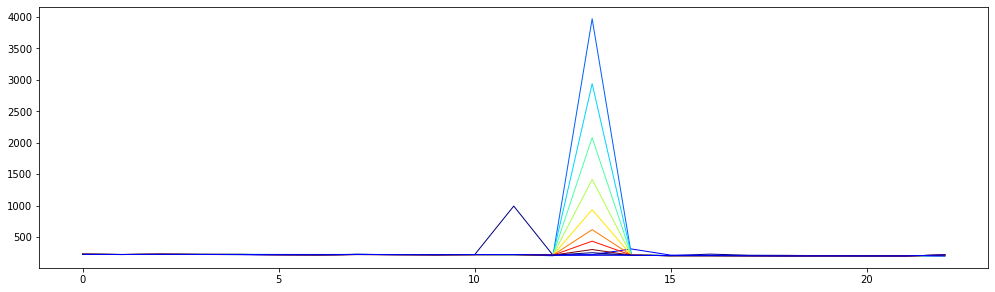

In [149]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['lines.linewidth'] = 1
#mpl.rcParams['lines.linestyle'] = '-'
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

colormap = plt.get_cmap('jet')
colors = [colormap(k) for k in np.linspace(0, 1, 10)]

mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

plt.figure(figsize=(17, 4.8))
plt.plot(a)
plt.show()